# 2024 Lok Sabha Election Ad Expenditure and Voting Trends by<span style="color:blue;"> Mohammed Sohail Mirza</span>

![Election](Designer%20(1).jpeg)

### **Indepth analysis of impact and distribution of social media ad spending on voter turnout and electoral outcomes in India, with a focus on state-wise and alliance-specific expenditures.**

#### The aim encompasses several key objectives:

1. **Analyzing the distribution of election social ad spending across different states.**
2. **Calculating the average voter turnout percentage for each state and highlighting the top 50 constituencies with the highest voting percentages and the bottom 50 constituencies with the lowest voting percentages..**
3. **Identifying and comparing the top parties by their ad spending and examining net ad spending in the top 5 states governed by the NDA alliance and the top 5 states governed by the INDIA alliance.****
4. **Comparing overall ad expenditures at the national level and by political alliances and studying the distribution of ad spending in entire india and the top allainces.**
5. **Tracking ad spending and voter turnout across different election phases.**

These objectives will help in understanding the correlation between ad spending and voter behavior, as well as identifying patterns and trends in political advertising and voter engagement.

# Importing Basic Libraries
Libraries in data analysis provide pre-written code for efficient tasks, enhancing productivity, consistency, and performance, while enabling effective visualization and collaboration among analysts for better insights and decision-making.

1. **`pandas`**: `pandas` is a powerful Python library for data manipulation and analysis. It provides data structures like Series (one-dimensional) and DataFrame (two-dimensional) that are used to store and manipulate tabular data. `pandas` is widely used for data cleaning, preparation, and exploration.
2. **`numpy`**: `numpy` is a fundamental library for numerical computing in Python. It provides support for arrays and matrices, along with a collection of mathematical functions to operate on these data structures. `numpy` is essential for performing efficient numerical computations and handling large datasets.
3. **`matplotlib`**: `matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is particularly known for its 2D plotting capabilities. `pyplot`, a module in `matplotlib`, provides a MATLAB-like interface for creating plots and graphs.
4. **`seaborn`**: `seaborn` is a data visualization library based on `matplotlib` that provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the process of creating complex visualizations and works seamlessly with `pandas` DataFrames.
5. **`plotly`**: `plotly` is an interactive graphing library that enables the creation of interactive plots, charts, and dashboards. `plotly.express` is a high-level interface for creating quick and easy visualizations, while `plotly.graph_objects` provides more control and customization over the plots.

In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import plotly.graph_objects as go

### Dataset Definition:

1. **Result Data**:
    - **Columns**:
        - **`_id`**: Unique identifier for each record.
        - **`Sl No`**: Serial number.
        - **`State`**: Contains the names of the states and union territory where elections took place.
        - **`PC_Name`**: Contains the names of the constituencies.
        - **`Total Electors`**: Total number of eligible voters in each constituency.
        - **`Polled (%)`**: Percentage of voters who cast their vote.
        - **`Total Votes`**: Total number of votes cast in each constituency.
        - **`Phase`**: Information about the phase in which the election occurred.

2. **Location Data**:
    - **Columns**:
        - **`Location name`**: Contains the names of the states and union Ttrritory.
        - **`Amount Spent (INR)`**: Net amount of money spent on social ads in each state, measured in Indian Rupees (INR).

3. **Advertise Data**:
    - **Columns**:
        - **`Page ID`**: Unique identifier for each advertising page.
        - **`Page name`**: Name of the advertising page.
        - **`Disclaimer`**: Disclaimer associated with the ads, often providing information about who paid for the ad.
        - **`Amount spent (INR)`**: Total amount of money spent on ads by the page, measured in Indian Rupees (INR).
        - **`Number of ads in Library`**: Total number of ads associated with the page available in the ad library.
     

Dataset Link - https://drive.google.com/drive/folders/1myJT4alegcmST8GpHZWfyFJj1Ie_pY-i?usp=sharing

**Lets Analyze!!**

In [3]:
#read the result dataset
result = pd.read_csv('results.csv')
result.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             550 non-null    int64  
 1   Sl No           543 non-null    float64
 2   State           543 non-null    object 
 3   PC_Name         550 non-null    object 
 4   Total Electors  550 non-null    int64  
 5   Polled (%)      550 non-null    float64
 6   Total Votes     550 non-null    int64  
 7   Phase           492 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 34.5+ KB


**Since each phase's total information was included in the preceding rows of subsequent phases in the dataset, we deleted these entries to prevent unwanted consequences.**

In [5]:
result = result.drop(result[result['PC_Name'] == 'Phase 1 Total'].index)

In [6]:
result = result.drop(result[result['PC_Name'] == 'Phase 2 Total'].index)

In [7]:
result = result.drop(result[result['PC_Name'] == 'Phase 3 Total'].index)

In [8]:
result = result.drop(result[result['PC_Name'] == 'Phase 4 Total'].index)

In [9]:
result = result.drop(result[result['PC_Name'] == 'Phase 5 Total'].index)

In [10]:
result = result.drop(result[result['PC_Name'] == 'Phase 6 Total'].index)

In [11]:
result = result.drop(result[result['PC_Name'] == 'Phase 7 Total'].index)

**Since Phase 7(i.e.,the last phase) was filled with NaN values in Phase Column, we filled the Phase column with 7 to correct this.**

In [12]:
result['Phase'] = result['Phase'].fillna(7)

In [13]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 0 to 548
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             543 non-null    int64  
 1   Sl No           543 non-null    float64
 2   State           543 non-null    object 
 3   PC_Name         543 non-null    object 
 4   Total Electors  543 non-null    int64  
 5   Polled (%)      543 non-null    float64
 6   Total Votes     543 non-null    int64  
 7   Phase           543 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 38.2+ KB


In [14]:
#read the location dataset
location = pd.read_csv('locations.csv')
location.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [15]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location name       36 non-null     object
 1   Amount spent (INR)  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes


In [16]:
location['Location name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab region', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Unknown',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

*Renaming location names in the **location dataset** to match those in the **result dataset** for easier analysis {'Andaman and Nicobar Islands': 'Andaman & Nicobar Islands', 'Delhi': 'NCT of Delhi', 'Dadra and Nagar Haveli': 'Dadra & Nagar Haveli and Daman & Diu', 'Punjab region': 'Punjab'}*

In [17]:
location['Location name'].replace({'Andaman and Nicobar Islands': 'Andaman & Nicobar Islands', 'Delhi': 'NCT of Delhi','Dadra and Nagar Haveli': 'Dadra & Nagar Haveli and\ndaman & diu', 'Punjab region': 'Punjab'}, inplace=True)

In [18]:
#read the advetise dataset
advetise = pd.read_csv('advertisers.csv')
advetise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Page ID                   20832 non-null  int64 
 1   Page name                 20832 non-null  object
 2   Disclaimer                20832 non-null  object
 3   Amount spent (INR)        20832 non-null  object
 4   Number of ads in Library  20832 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 813.9+ KB


In [19]:
advetise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Page ID                   20832 non-null  int64 
 1   Page name                 20832 non-null  object
 2   Disclaimer                20832 non-null  object
 3   Amount spent (INR)        20832 non-null  object
 4   Number of ads in Library  20832 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 813.9+ KB


**Though there wasn't proper information about Territory Ladakh in the location dataset, we removed it from the result dataset to simplify further analysis.**

In [20]:
result = result[result['State'] != 'Ladakh']

*Converted the matching columns of the ***result*** and ***location datasets*** ('State' and 'Location name') to lowercase and remove any unnecessary spaces.*

In [21]:
result['State'] = result['State'].str.strip().str.lower()
location['Location name'] = location['Location name'].str.strip().str.lower()

*Renamed the column Location name in the ***location dataset*** to 'State' to facilitate easier merging with the ***result dataset***.*

In [22]:
location.rename(columns={'Location name': 'State'}, inplace=True)

*Merged the ***result dataset*** with the ***location dataset*** based on the 'State' column. 
This allows for combining election information in terms of each state. The resulting ***merged_data DataFrame*** contain all columns from result and additional columns from location where matching 'State' values are found.*

In [23]:
merged_data = pd.merge(result, location, on='State', how='left')

In [24]:
merged_data

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,377858
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,1385654
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,1385654
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,17478091
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,17478091
...,...,...,...,...,...,...,...,...,...
537,545,53.0,west bengal,Jadavpur,2033525,76.68,1559330,7.0,77244996
538,546,54.0,west bengal,Joynagar,1844780,80.08,1477298,7.0,77244996
539,547,55.0,west bengal,Kolkata Dakshin,1849520,66.95,1238256,7.0,77244996
540,548,56.0,west bengal,Kolkata Uttar,1505356,63.59,957319,7.0,77244996


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 542 non-null    int64  
 1   Sl No               542 non-null    float64
 2   State               542 non-null    object 
 3   PC_Name             542 non-null    object 
 4   Total Electors      542 non-null    int64  
 5   Polled (%)          542 non-null    float64
 6   Total Votes         542 non-null    int64  
 7   Phase               542 non-null    float64
 8   Amount spent (INR)  542 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 38.2+ KB


# State and Union Territory[UT] ad spent and Voter Percentage Turnout

**Created a DataFrame** based on Calculated total advertising expenditure ***(`Amount spent (INR)`)*** for each state by grouping by ***(`State`)***, summing the expenditures, and resetting the index for clarity in further analysis.*

In [26]:
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()
state_ad_spend.head()

,State,Amount spent (INR)
0,andaman & nicobar islands,377858
1,andhra pradesh,2520493300
2,arunachal pradesh,2771308
3,assam,244693274
4,bihar,2144769680


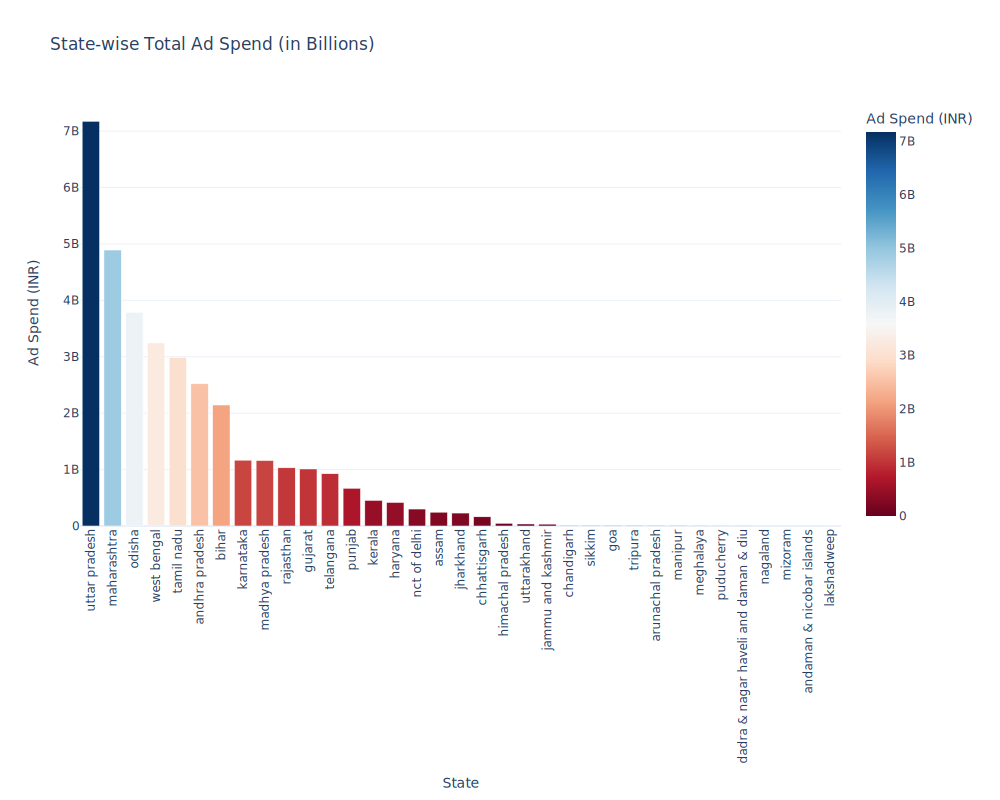

In [27]:
# Use the default color scale in Plotly Express
fig = px.bar(state_ad_spend, x='State', y='Amount spent (INR)',
             labels={'State': 'State', 'Amount spent (INR)': 'Ad Spend (INR)'},
             title='State-wise Total Ad Spend (in Billions)',
             color='Amount spent (INR)',  # Color by 'Amount spent (INR)' column
             color_continuous_scale='RdBu',  # Choose a continuous color scale
             range_color=(0, state_ad_spend['Amount spent (INR)'].max()),  # Set color scale range
             hover_name='State',  # Display state name on hover
             hover_data={'Amount spent (INR)': ':,.2f'},  # Format hover data
            )

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=1000,
                  height=800)

fig.show("svg")

The above bar graph shows the total advertising spending in India in billions of rupees (INR) for each state and union territory [UT]. 

List of five states and UTs with the highest total ad spend                
1. **Uttar Pradesh**
2. **Maharashtra**
3. **Odisha**
4. **West Bengal**
5. **Tamil Nadu**

List of five states and UTs with the lowest total ad spend
1. **dadar & nagar haveli and daman and diu**
2. **Nagaland**
3. **Mizoram**
4. **Andaman and Nicobar Islands**
5. **Lakshadweep**

-------------------------------------------------------------------------------------------------------------------------------------------

**Created a DataFrame** based on Calculated average voter turnout ***(`Polled (%)`)*** for each state by grouping ***(`State`)***, computing the mean of voter turnout percentages, and resetting the index for analysis.

In [28]:
state_avg_voting = merged_data.groupby('State')['Polled (%)'].mean().reset_index()
state_avg_voting

,State,Polled (%)
0,andaman & nicobar islands,64.100000
1,andhra pradesh,80.770800
2,arunachal pradesh,78.455000
3,assam,80.882857
4,bihar,56.329500
5,chandigarh,67.980000
6,chhattisgarh,73.105455
7,dadra & nagar haveli and\ndaman & diu,70.645000
8,goa,76.080000
9,gujarat,60.140400


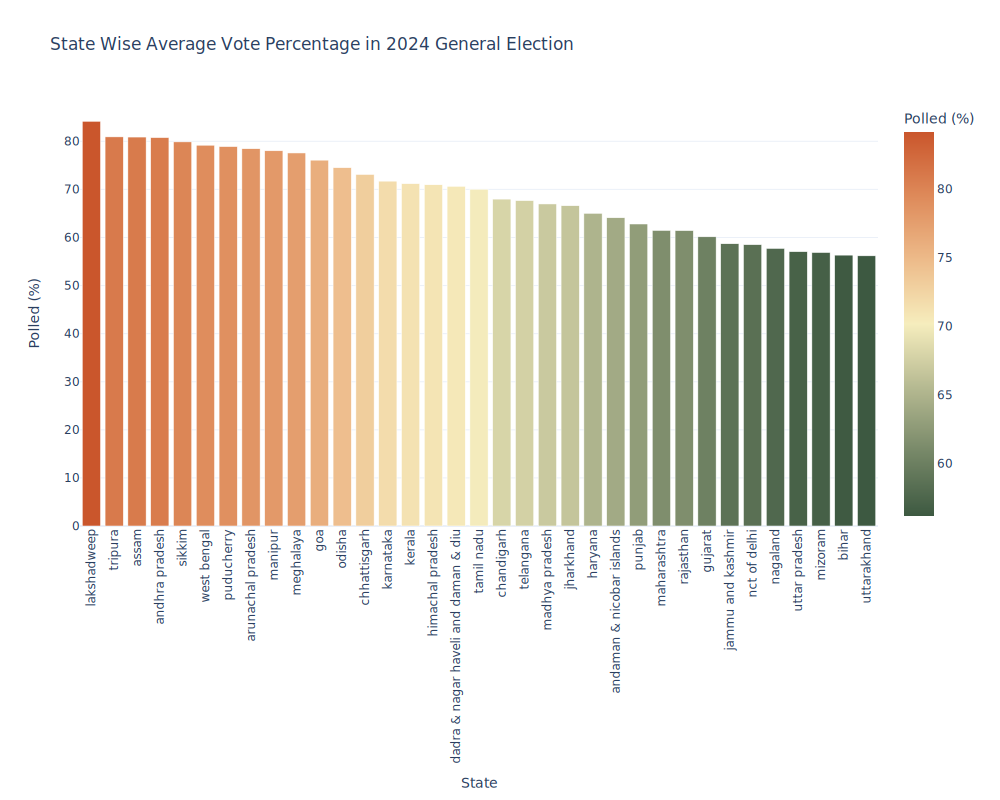

In [48]:
fig = px.bar(state_avg_voting, x='State', y='Polled (%)',
             labels={'State': 'State', 'Polled (%)': 'Polled (%)'},
             title='State Wise Average Vote Percentage in 2024 General Election',
             color='Polled (%)',
             color_continuous_scale='fall')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=1000,
                  height=800,
                  template='plotly_white')

fig.show("svg")

The above bar graph shows **Average Vote Percentage in 2024 General Election in state and union territory [UT].**

List of five states and UTs with the **highest average vote percent**               
1. **Lakshadweep - 84.16 %**
2. **Tripura - 80.92 %**
3. **Assam - 80.88 %**
4. **Andra Pradesh - 80.77 %**
5. **Sikkim - 79.88 %**

List of five states and UTs with the **lowest average vote percent**
1. **Nagaland - 57.72 %**
2. **Uttar Pradesh - 57.04 %**
3. **Mizoram - 56.87 %**
4. **Bihar - 56.32 %**
5. **Uttrakhand - 56.18 %**

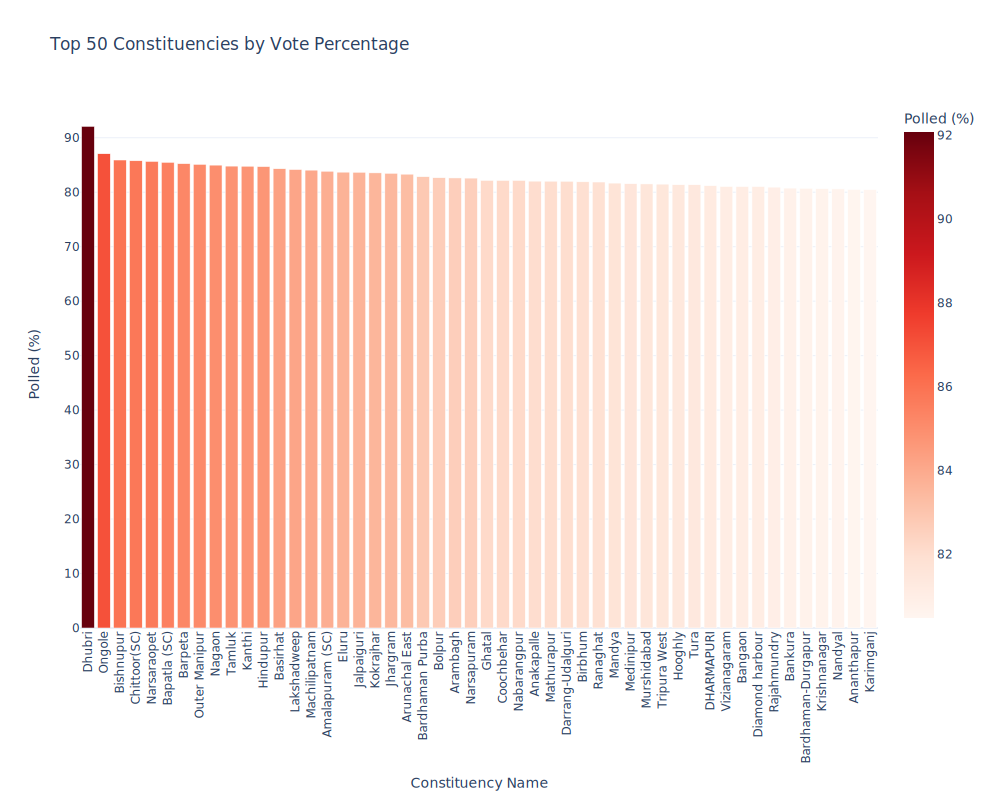

In [49]:
top_50_constituency_high_vote = merged_data.groupby('PC_Name')['Polled (%)'].nlargest(50).reset_index().sort_values(by='Polled (%)',ascending=False)
top_50_constituency_high_vote
top_50_constituency_high_vote = top_50_constituency_high_vote.head(50)

import plotly.express as px

# Assuming top_50_constituency_high_vote is a DataFrame with the necessary data
fig = px.bar(top_50_constituency_high_vote, x='PC_Name', y='Polled (%)',
             labels={'PC_Name': 'Constituency Name', 'Polled (%)': 'Polled (%)'},
             title='Top 50 Constituencies by Vote Percentage',
             color='Polled (%)',
             color_continuous_scale='reds')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=1000,
                  height=800,
                  template='plotly_white')

fig.update_traces(hovertemplate='<b>%{x}</b><br>Polled: %{y:.2f}%')

fig.show("svg")

The above bar graph shows **Top 50 Constituency with Highest Vote Percentage** in 2024 General Election in state and union territory [UT].

List of ten constituency in states and UTs with the **highest vote percent**               
1. **Dhubri - 92.08 %**
2. **Ongole - 87.06 %**
3. **Bishnupur - 85.91 %**
4. **Chittoor(SC) - 85.77 %**
5. **Narsaraopet - 85.65 %**
6. **Bapatla (SC) - 85.48 %**
7. **Barpeta - 85.24 %**
8. **Outer Manipur - 85.11 %**
9. **Nagaon - 84.97 %**
10. **Tamluk - 84.79 %**

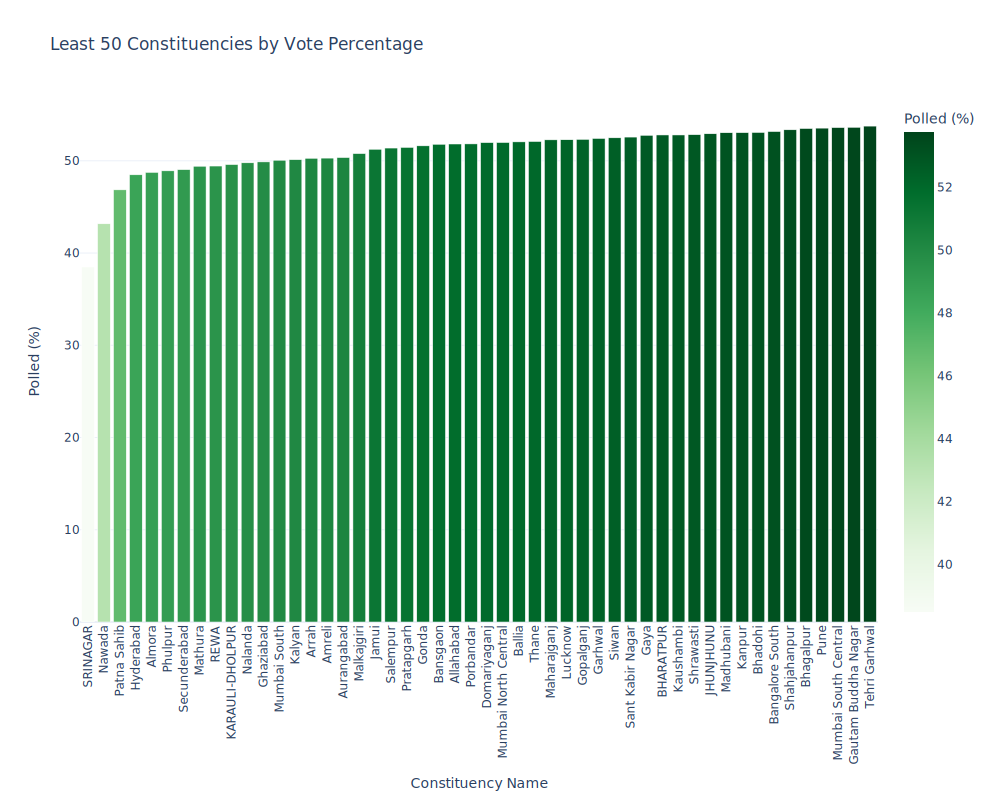

In [50]:
least_50_constituency_low_vote = merged_data.groupby('PC_Name')['Polled (%)'].nlargest(50).reset_index().sort_values(by='Polled (%)',ascending=True)
least_50_constituency_low_vote
least_50_constituency_low_vote = least_50_constituency_low_vote.head(50)


# Assuming least_50_constituency_low_vote is a DataFrame with the necessary data
fig = px.bar(least_50_constituency_low_vote, x='PC_Name', y='Polled (%)',
             labels={'PC_Name': 'Constituency Name', 'Polled (%)': 'Polled (%)'},
             title='Least 50 Constituencies by Vote Percentage',
             color='Polled (%)',
             color_continuous_scale='greens')

fig.update_layout(xaxis={'categoryorder': 'total ascending'},
                  xaxis_tickangle=-90,
                  width=1000,
                  height=800,
                  template='plotly_white')

fig.update_traces(hovertemplate='<b>%{x}</b><br>Polled: %{y:.2f}%')

fig.show("svg")


The above bar graph shows **Least 50 Constituency with Lowest Vote Percentage** in 2024 General Election in state and union territory [UT].

List of ten constituency in states and UTs with the **lowest vote percent**               
1. **SRINAGAR - 38.49 %**
2. **Nawada - 43.17 %**
3. **Patna Sahib - 46.85 %**
4. **Hydrabad - 48.48 %**
5. **Almora - 48.74 %**
6. **Phulpur - 48.91 %**
7. **Secunderabad - 49.04 %**
8. **Mathura - 49.41 %**
9. **REWA - 49.43 %**
10. **KARAULI - DHOLPUR - 49.59 %**

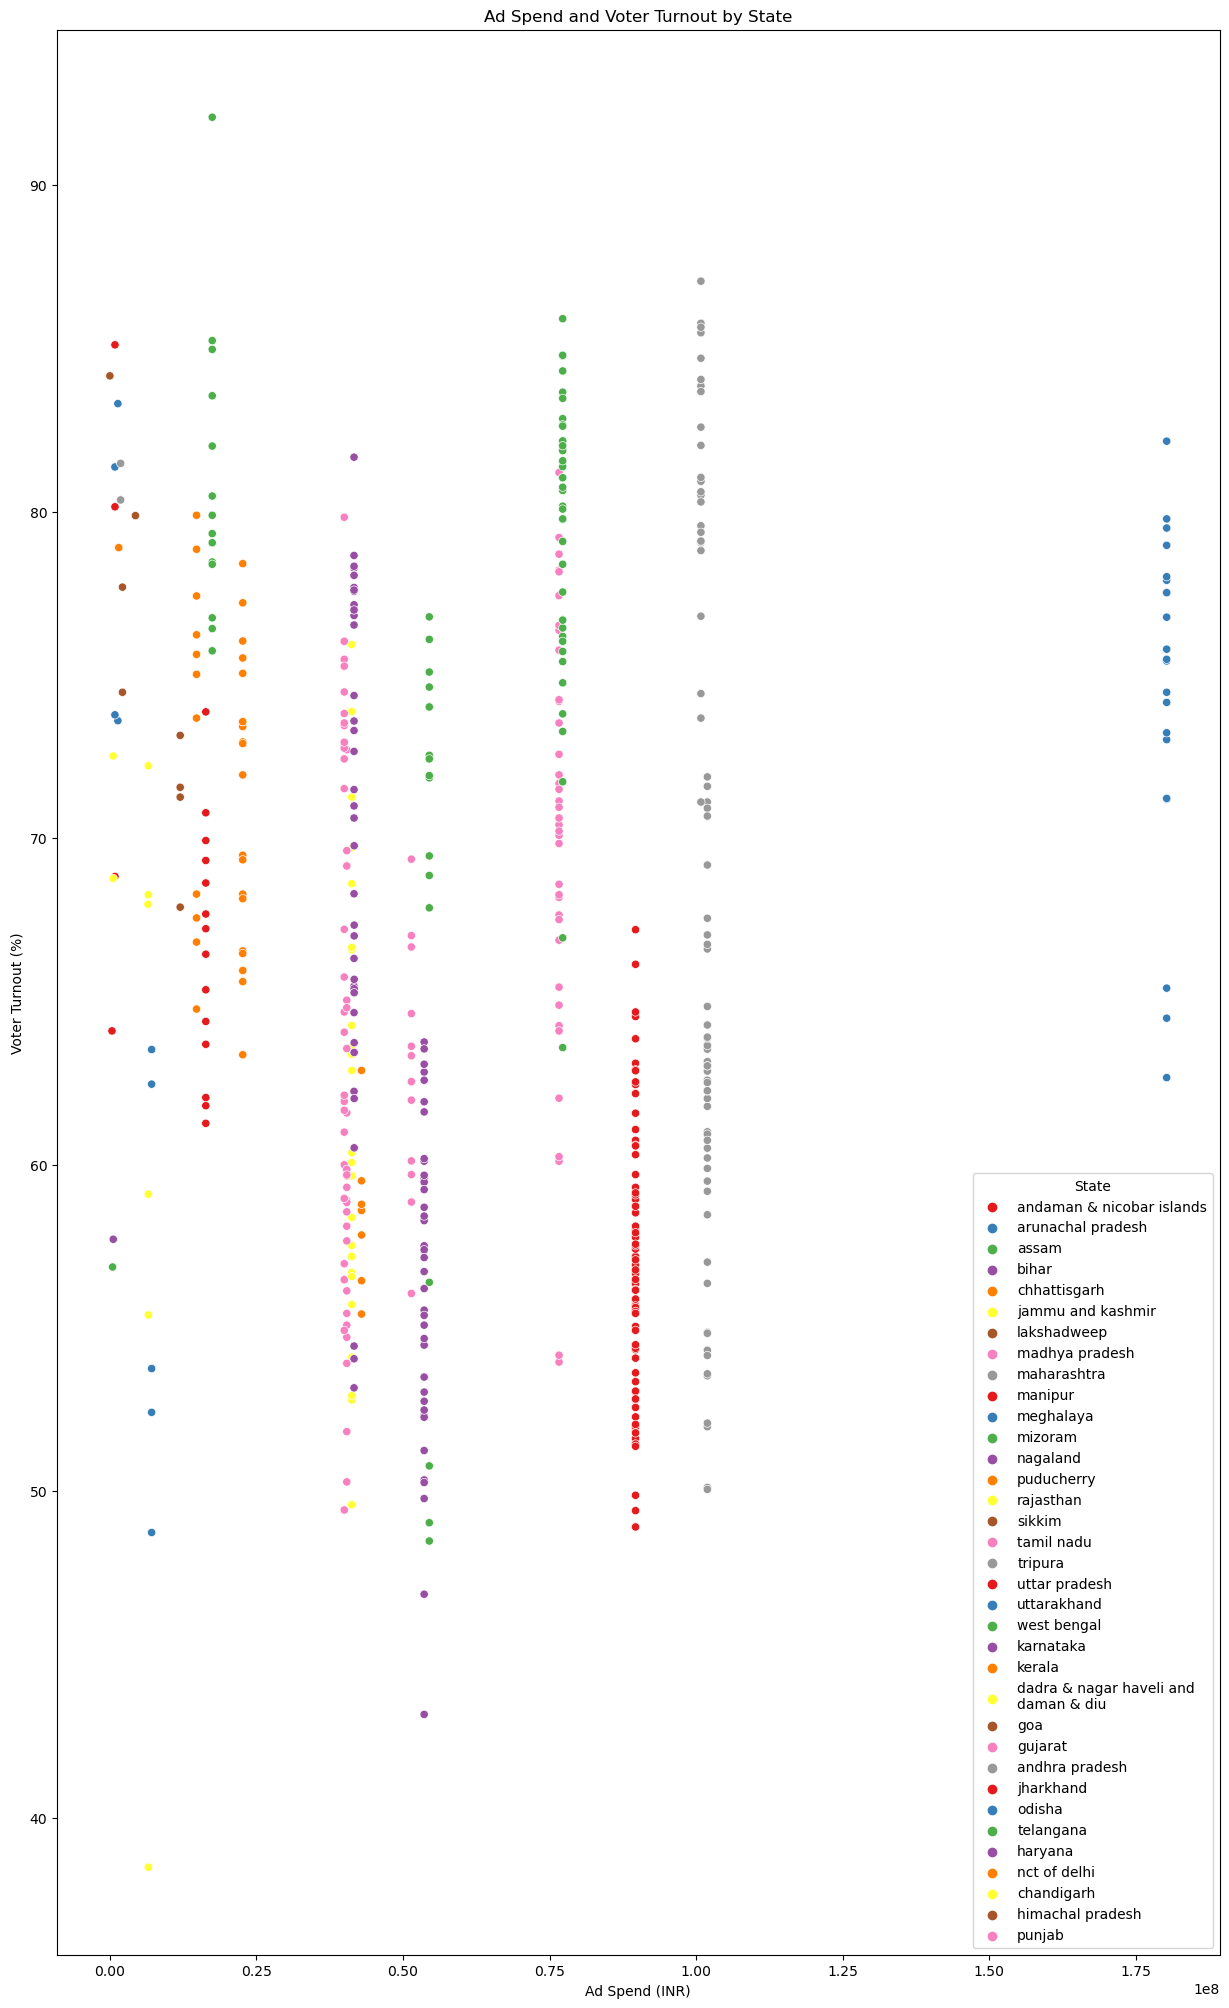

In [32]:
plt.figure(figsize=(15, 25))
sns.scatterplot(data=merged_data, x='Amount spent (INR)', y='Polled (%)', hue='State', palette='Set1')

# Customize labels and title
plt.xlabel('Ad Spend (INR)')
plt.ylabel('Voter Turnout (%)')
plt.title('Ad Spend and Voter Turnout by State')

# Show the plot
plt.show()

#### Ad Expendiure and Average Voter turnout Analysis in states and union territory[UT].

-------------------------------------------------------------------------------------------------------------------------------------------

# Top 5 Parties' Net Spending in India and Leading Alliance Rulling States

In [33]:
party_spend = advetise.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

In [34]:
advetise['Amount spent (INR)'] = pd.to_numeric(advetise['Amount spent (INR)'], errors='coerce')
advetise.dropna(subset=['Amount spent (INR)'], inplace=True)
party_spend = advetise.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)
party_spend

Page name
Bharatiya Janata Party (BJP)                193854342.0
Ama Chinha Sankha Chinha                    112412941.0
Indian National Congress                    108787100.0
Ellorum Nammudan                             23806041.0
BJP Odisha                                   19573782.0
                                               ...     
Ranjit Nath                                       101.0
Old coin selling company in Mumbai India          101.0
chilliestirupati                                  101.0
nihitsirpolity                                    101.0
महा MTB                                           101.0
Name: Amount spent (INR), Length: 11590, dtype: float64

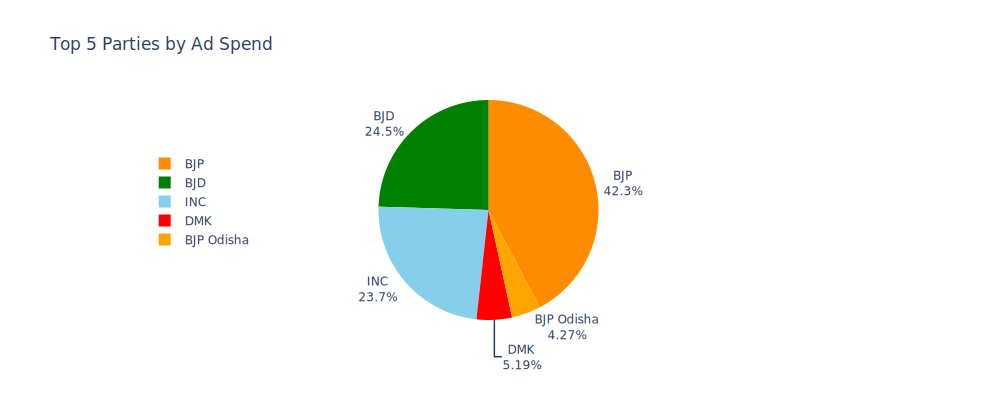

In [51]:
top_5_parties = party_spend.head(5).reset_index()


fig = go.Figure(data=[go.Pie(labels=['BJP', 'BJD', 'INC', 'DMK', 'BJP Odisha'],
                             values=top_5_parties['Amount spent (INR)'],
                             textinfo='label+percent',
                             textposition='outside',
                             marker=dict(colors=['darkorange', 'green', 'skyblue', 'red', 'orange']))])

fig.update_layout(
    title_text='Top 5 Parties by Ad Spend',
    showlegend=True,
    legend=dict(
        orientation='v',
        xanchor='left',
        yanchor='bottom',
        x=-0.1,
        y=0.3  # Adjust to ensure it doesn't overlap the graph
    ),
    width=1000,  # Increase figure width
    height=400  # Increase figure height
)

fig.show("svg")

The above pie graph shows **Top 5 Parties with the Highest Net Contribution to Spending** in 2024 General Election in state and union territory [UT].

List of top five parties contibution in ad spend in states and UTs among **Top 5 Parties with the Highest Net Contribution to Spending**               
1. **BJP (NDA) - 42.3 %**
2. **BJD - 24.5 %**
3. **INC (INDIA) - 23.7 %**
4. **DMK (INDIA) - 5.19 %**
5. **BJP Odisha (NDA) - 4.27 %**

### Top 5 Parties' Net Spending in NDA Alliance Rulling States

In [36]:
#Checking on BJP and NDA Ruling State
#List of NDA and its alliance Rulling State UK, HR, RJ, GJ, MH, AP, CG, MP, UP, BR, MN, ML, NL, PY, SK, TR, GA, AR, AS
NDA_States = ['arunachal pradesh', 'assam', 'bihar','chhattisgarh',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya',
       'nagaland', 'puducherry', 'rajasthan', 'sikkim',
       'tripura', 'uttar pradesh', 'uttarakhand',
       'goa', 'gujarat', 'andhra pradesh', 'haryana']

# Filter rows based of above mentioned state in terms of 'State' column
NDA = merged_data[merged_data['State'].isin(NDA_States)]

#grouping by State and Amount Spent in the extracted NDA States
NDA_State_Spent_by_all_parties = NDA.groupby('State')['Amount spent (INR)'].sum().reset_index()
NDA_State_Spent_by_all_parties_1 = NDA_State_Spent_by_all_parties.sort_values(by='Amount spent (INR)',ascending=False)
Net_NDA_Rulling_Spent_top_5 = NDA_State_Spent_by_all_parties_1.head(5)

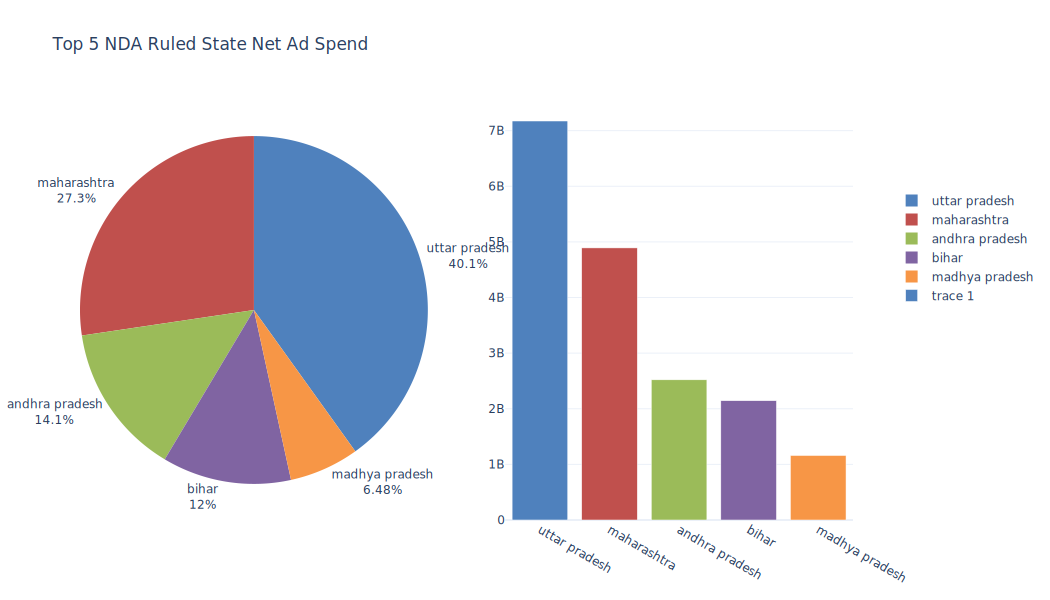

In [52]:
from plotly.subplots import make_subplots
colors = ['#4F81BD', '#C0504D', '#9BBB59', '#8064A2', '#F79646']

# Create subplots: use 'domain' type for pie charts and 'xy' type for bar charts
fig = make_subplots(
    rows=1, cols=2,  # One row and two columns
    specs=[[{'type': 'domain'}, {'type': 'xy'}]],  # Specify the types of subplots
)

# Add pie chart
fig.add_trace(go.Pie(labels=Net_NDA_Rulling_Spent_top_5['State'],
                     values=Net_NDA_Rulling_Spent_top_5['Amount spent (INR)'],
                     textinfo='label+percent',
                     textposition='outside',
                     marker=dict(colors=colors)),
              row=1, col=1)

# Add bar chart
fig.add_trace(go.Bar(x=Net_NDA_Rulling_Spent_top_5['State'],
                     y=Net_NDA_Rulling_Spent_top_5['Amount spent (INR)'],
                     marker=dict(color=colors)),
              row=1, col=2)

# Update layout
fig.update_layout(
    title_text='Top 5 NDA Ruled State Net Ad Spend',
    showlegend=True,
    legend=dict(
        orientation='v',
        xanchor='left',
        yanchor='bottom',
        x=1.05,
        y=0.5
    ),
    width=1050,  # Adjust figure width
    height=600   # Adjust figure height
)

fig.show("svg")


The above graph shows the top 5 net amount contribution among NDA alliance rulling states and unioin territory[UT]

List of **top five state and UT** net ad spend among NDA alliance rulling states and unioin territory[UT]               
1. **Uttar Pradesh - 40.1 % ~ 7.17B (INR)**
2. **Maharashtra - 27.3 % ~ 4.89B (INR)**
3. **Andra Pradesh - 14.1 % ~ 2.52B (INR)**
4. **Bihar - 12 % ~ 2.14B (INR)**
5. **Madhya Pradesh - 6.48 % ~ 1.15B (INR)**


### Top 5 Parties' Net Spending in INDIA Alliance Rulling States

In [38]:
#Checking on INDIA and its Allies
#PB, HP, KR, NCT, JK, WB, TN, TS, KL

INDIA_States = ['tamil nadu', 'west bengal',
       'karnataka', 'kerala', 'jharkhand',
       'telangana', 'nct of delhi',
       'himachal pradesh', 'punjab']

# Filter rows based on 'State' column
INDIA = merged_data[merged_data['State'].isin(INDIA_States)]

INDIA_State_Spent_by_all_parties = INDIA.groupby('State')['Amount spent (INR)'].sum().reset_index().sort_values(by='Amount spent (INR)',ascending=False)
Net_India_Ruling_State_top_5 = INDIA_State_Spent_by_all_parties.head(5)

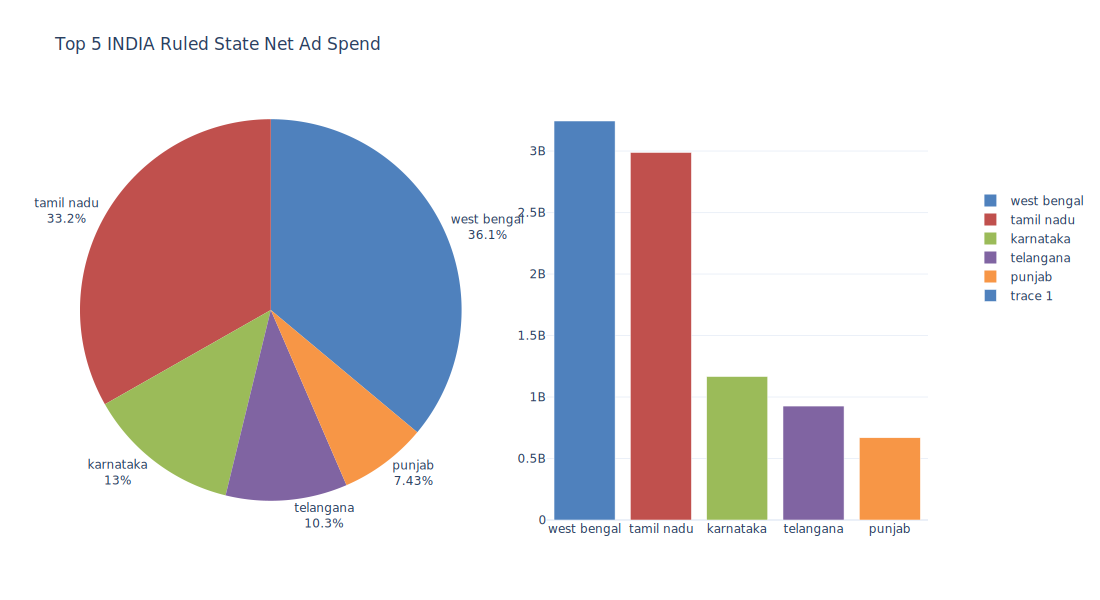

In [53]:
colors = ['#4F81BD', '#C0504D', '#9BBB59', '#8064A2', '#F79646']

# Create subplots: use 'domain' type for pie charts
fig = make_subplots(
    rows=1, cols=2,  # One row and two columns
    specs=[[{'type': 'domain'}, {'type': 'xy'}]],  # Specify the types of subplots
)

# Add pie chart
fig.add_trace(go.Pie(labels=Net_India_Ruling_State_top_5['State'],
                     values=Net_India_Ruling_State_top_5['Amount spent (INR)'],
                     textinfo='label+percent',
                     textposition='outside',
                     marker=dict(colors=colors)),
              row=1, col=1)

# Add bar chart
fig.add_trace(go.Bar(x=Net_India_Ruling_State_top_5['State'],
                     y=Net_India_Ruling_State_top_5['Amount spent (INR)'],
                     marker=dict(color=colors)),
              row=1, col=2)

# Update layout
fig.update_layout(
    title_text='Top 5 INDIA Ruled State Net Ad Spend',
    showlegend=True,
    legend=dict(
        orientation='v',
        xanchor='left',
        yanchor='bottom',
        x=1.05,
        y=0.5
    ),
    width=1100,  # Adjust figure width
    height=600   # Adjust figure height
)

fig.show("svg")


The above graph shows the top 5 net amount contribution among INDIA alliance rulling states and unioin territory[UT]

List of **top five state and UT** net ad spend among INDIA alliance rulling states and unioin territory[UT]               
1. **West Bengal - 36.1 % ~ 3.24B (INR)**
2. **Tamil Nadu - 33.2 % ~ 2.98B (INR)**
3. **Karnataka - 13 % ~ 1.16B (INR)**
4. **Telengana - 10.3 % ~ 0.92B (INR)**
5. **Punjab - 7.43 % ~ 0.66B (INR)**

# Compaisrion of Entire India with main Alliances

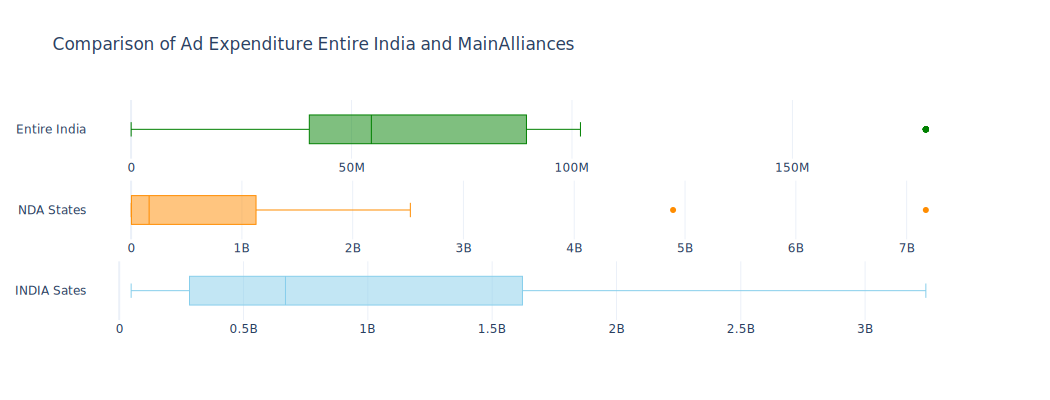

In [54]:
# Create subplots: one row with two columns
fig = make_subplots(rows=3, cols=1)

# Add box plot forentire India
fig.add_trace(go.Box(
    x=merged_data['Amount spent (INR)'],
    marker_color='green',
    line_width=1,
    name='Entire India'
), row=1, col=1)

# Add box plot for NDA Alliance
fig.add_trace(go.Box(
    x=NDA_State_Spent_by_all_parties['Amount spent (INR)'],
    marker_color='darkorange',
    line_width=1,
    name='NDA States'
), row=2, col=1)

# Add box plot for India Alliance
fig.add_trace(go.Box(
    x=INDIA_State_Spent_by_all_parties['Amount spent (INR)'],
    marker_color='skyblue',
    line_width=1,
    name='INDIA Sates'
), row=3, col=1)

# Update layout for the entire figure
fig.update_layout(
    title='Comparison of Ad Expenditure Entire India and MainAlliances',
    width=1050,  # Adjust figure width
    height=400,  # Adjust figure height
    showlegend=False  # No need for legend with single trace in each subplot
)

# Update subplot titles and spacing
fig.update_annotations(font_size=16, font_family='Arial', xref="paper", yref="paper", showarrow=False)

fig.show("svg")

The above graph summerize the net expenditure in terms of five-number summary is the 
1. **Minimum**
2. **First quartile**
3. **Median**
4. **Third quartile**
5. **Maximum**

In [41]:
net_india_ruling_spent = INDIA_State_Spent_by_all_parties['Amount spent (INR)'].sum()
net_nda_ruling_spent = NDA_State_Spent_by_all_parties['Amount spent (INR)'].sum()
merged_spent = merged_data['Amount spent (INR)'].sum()

# Create a dictionary with the data
data_india_Allaice_wise = {
    'India': ['Entire India', 'N.D.A Allaince', 'I.N.D.I.A Alliance'],
    'Net spent': [merged_spent, net_nda_ruling_spent,net_india_ruling_spent]
}
df = pd.DataFrame(data_india_Allaice_wise)

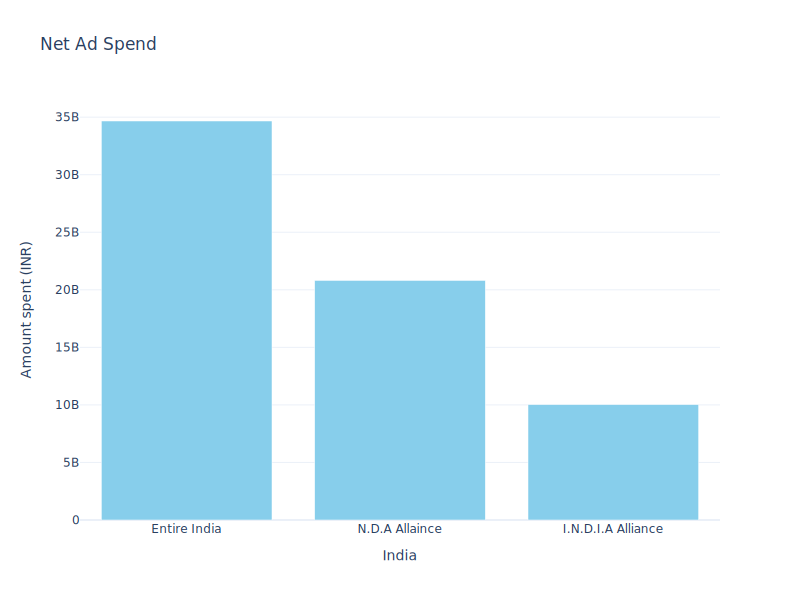

In [55]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['India'],
    y=df['Net spent'],
    marker=dict(color='skyblue')  # Customize the color of bars
))

# Update the layout
fig.update_layout(
    title='Net Ad Spend',
    xaxis_title='India',
    yaxis_title='Amount spent (INR)',
    width=800,  # Adjust figure width
    height=600  # Adjust figure height
)

# Show the plot
fig.show("svg")


The above bar graph shows a comparison of net expenditure in entire **India and two main alliances ruling state** during the 2024 General Election.         
1. **India - 34.66B (INR)**
2. **NDA Alliance Ruling State - 20.18B (INR)**
3. **INDIA Alliance Ruling State - 10.02B (INR)**


# Checking the number of constituencies within specific net expenditure ranges.

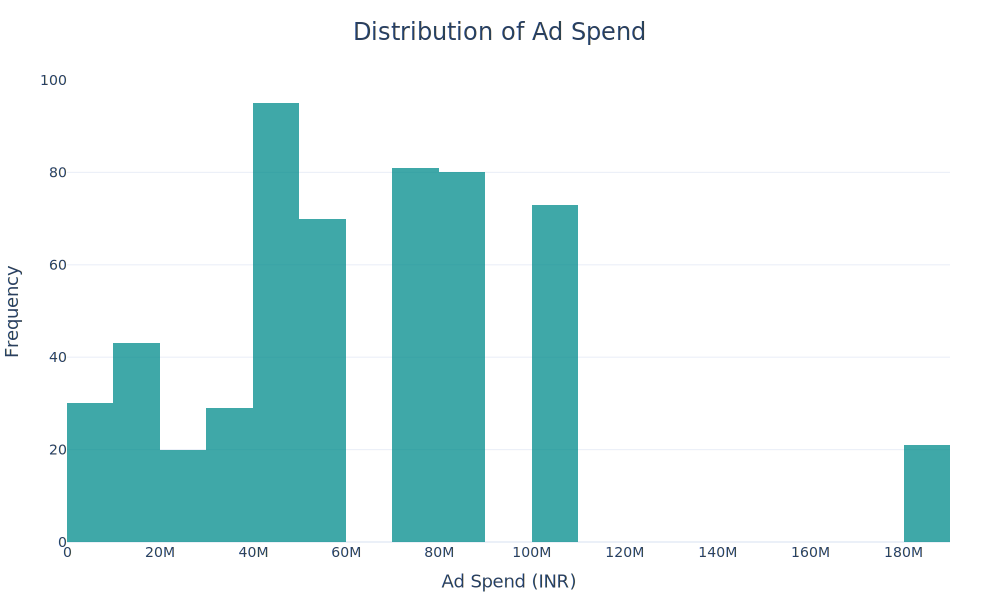

In [56]:
# Create the histogram plot
fig = go.Figure()

# Add histogram trace
fig.add_trace(go.Histogram(
    x=merged_data['Amount spent (INR)'],
    nbinsx=30,  # Number of bins
    marker_color='darkcyan',
    opacity=0.75,
    name='Histogram',
    hoverinfo='x+y'
))

# Update layout for better aesthetics
fig.update_layout(
    title=dict(
        text='Distribution of Ad Spend',
        font=dict(size=24),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Ad Spend (INR)',
        titlefont=dict(size=18),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(size=18),
        tickfont=dict(size=14)
    ),
    width=1000,  # Adjust figure width
    height=600,  # Adjust figure height
    legend=dict(
        font=dict(size=14),
        x=1,
        xanchor='right',
        y=1,
        yanchor='top'
    ),
    margin=dict(l=50, r=50, t=80, b=50),
    plot_bgcolor='rgba(0,0,0,0)',  # Make background transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Make background transparent
)

# Show the plot
fig.show("svg")


-------------------------------------------------------------------------------------------------------------------------------------------

# Phase Wise Expenditure and voter turnout analysis

In [44]:
phase_data = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

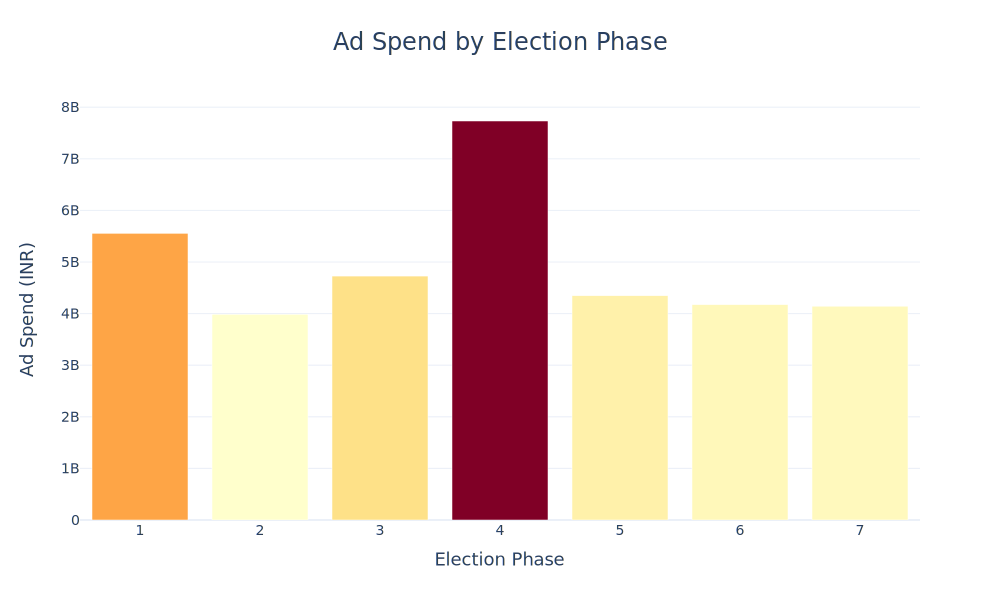

In [57]:
fig = px.bar(
    phase_data,
    x='Phase',
    y='Amount spent (INR)',
    title='Ad Spend by Election Phase',
    labels={'Amount spent (INR)': 'Ad Spend (INR)', 'Phase': 'Election Phase'},
    color='Amount spent (INR)',
    color_continuous_scale='ylorrd'
)

# Customize the layout
fig.update_layout(
    title=dict(
        text='Ad Spend by Election Phase',
        font=dict(size=24),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Election Phase',
        titlefont=dict(size=18),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Ad Spend (INR)',
        titlefont=dict(size=18),
        tickfont=dict(size=14)
    ),
    width=1000,  # Adjust figure width
    height=600,  # Adjust figure height
    plot_bgcolor='rgba(0,0,0,0)',  # Make background transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Make background transparent
    coloraxis_showscale=False  # Hide color bar
)

# Show the plot
fig.show("svg")

The above bar graph shows a comparison of net expenditure in India **among diffrent phases** of 2024 General Election.         
1. **Phase 1 - 5.55B (INR)**
2. **Phase 2 - 3.98B (INR)**
3. **Phase 3 - 4.72B (INR)**
4. **Phase 4 - 7.73B (INR)**
5. **Phase 5 - 4.34B (INR)**
6. **Phase 6 - 4.17B (INR)**
7. **Phase 7 - 4.14B (INR)**

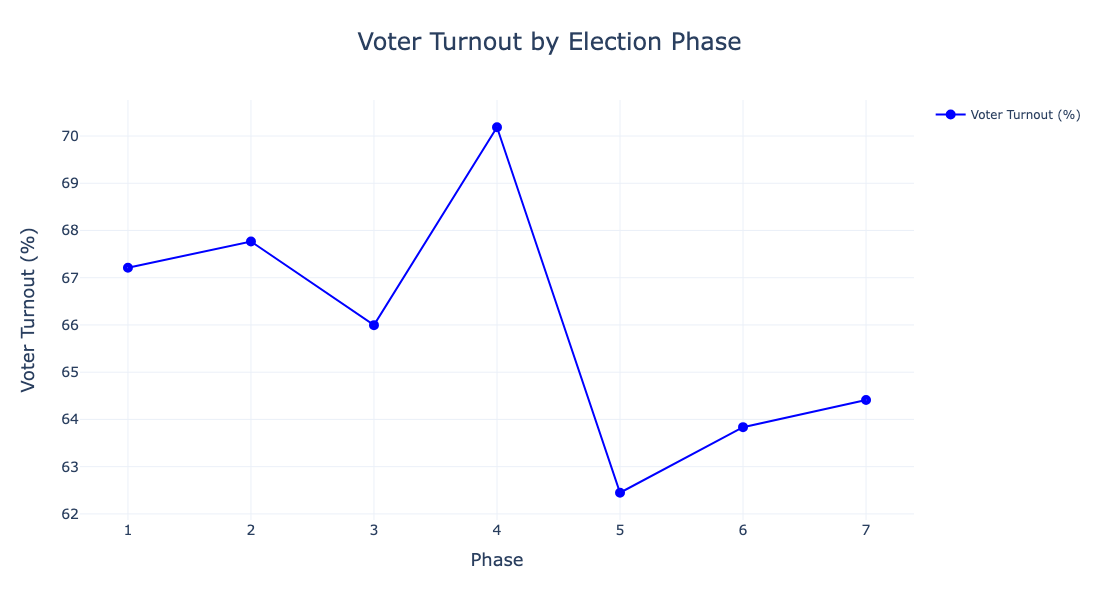

In [46]:
fig = go.Figure()

# Add line trace
fig.add_trace(go.Scatter(
    x=phase_data['Phase'],
    y=phase_data['Polled (%)'],
    mode='lines+markers',
    marker=dict(symbol='circle-dot', size=10, color='blue'),  # Customize marker
    line=dict(color='blue'),  # Customize line color
    name='Voter Turnout (%)'
))

# Update layout for better aesthetics
fig.update_layout(
    title=dict(
        text='Voter Turnout by Election Phase',
        font=dict(size=24),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Phase',
        titlefont=dict(size=18),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Voter Turnout (%)',
        titlefont=dict(size=18),
        tickfont=dict(size=14)
    ),
    width=1100,  # Adjust figure width
    height=600,  # Adjust figure height
    showlegend=True
)

# Show the plot
fig.show()

The above line graph shows **the avearge voter turnout among diffrent phases** of 2024 General Election.    

1. **Phase 1 - 67.21 %**
2. **Phase 2 - 67.76 %**
3. **Phase 3 - 65.99 %**
4. **Phase 4 - 70.18 %**
5. **Phase 5 - 62.44 %**
6. **Phase 6 - 63.83 %**
7. **Phase 7 - 64.41 %**

-------------------------------------------------------------------------------------------------------------------------------------------

Lets the correlation of (`Amount spent (INR)`) and (`Polled (%)`)

In [47]:
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.002935
Polled (%)                   -0.002935    1.000000


# Summary

The analysis of the 2024 General Election in India highlights significant trends and statistics across various categories.

**Ad Spending**:
   - **Top 5 States/UTs with Highest Ad Spend**: Uttar Pradesh, Maharashtra, Odisha, West Bengal, and Tamil Nadu.
   - **Lowest Ad Spend**: Dadra & Nagar Haveli and Daman & Diu, Nagaland, Mizoram, Andaman and Nicobar Islands, Lakshadweep.
   - **Top Parties by Ad Spend**: BJP (NDA), BJD, INC (INDIA), DMK (INDIA), BJP Odisha (NDA).
   - **NDA Alliance States**: Uttar Pradesh (40.1%), Maharashtra (27.3%), Andhra Pradesh (14.1%), Bihar (12%), Madhya Pradesh (6.48%).
   - **INDIA Alliance States**: West Bengal (36.1%), Tamil Nadu (33.2%), Karnataka (13%), Telangana (10.3%), Punjab (7.43%).
   - **Total Expenditure**: India (34.66B INR), NDA (20.18B INR), INDIA (10.02B INR).

**Voter Turnout**:
   - **Highest Average Vote Percentage**: Lakshadweep (84.16%), Tripura (80.92%), Assam (80.88%), Andhra Pradesh (80.77%), Sikkim (79.88%).
   - **Lowest Average Vote Percentage**: Nagaland (57.72%), Uttar Pradesh (57.04%), Mizoram (56.87%), Bihar (56.32%), Uttarakhand (56.18%).

**Constituencies**:
   - **Highest Vote Percentage**: Dhubri (92.08%), Ongole (87.06%), Bishnupur (85.91%), Chittoor(SC) (85.77%), Narsaraopet (85.65%).
   - **Lowest Vote Percentage**: Srinagar (38.49%), Nawada (43.17%), Patna Sahib (46.85%), Hyderabad (48.48%), Almora (48.74%).

**Election Phases**:
   - **Ad Expenditure by Phase**: Phase 1 (5.55B INR), Phase 2 (3.98B INR), Phase 3 (4.72B INR), Phase 4 (7.73B INR), Phase 5 (4.34B INR), Phase 6 (4.17B INR), Phase 7 (4.14B INR).
   - **Voter Turnout by Phase**: Phase 1 (67.21%), Phase 2 (67.76%), Phase 3 (65.99%), Phase 4 (70.18%), Phase 5 (62.44%), Phase 6 (63.83%), Phase 7 (64.41%).

**The correlation between ad spending and voter turnout is -0.002935, indicating a very weak negative relationship.**

-------------------------------------------------------------------------------------------------------------------------------------------

## **Contact Information**
*Please contact us for additional inquiries and collaboration opportunities.*

### **Email**

mdssohail1018@gmail.com

### **Github**
(**tsohail12**)

## ***Thank you for your time and consideration!!!***